In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

zillow = pd.read_csv('../../data/zillow_full_imputed.csv')

In [2]:
#zillow.columns
features = zillow[['PersonalIncome', 'AQIMean','Vol_moderate_income',
                   'Vol_low_income', 'total_pop', 'households', 'median_age',
                   'median_income', 'income_per_capita', 'gini_index', 'pct_poverty',
                   'housing_availability', 'home_density', 'pct_employed',
                   'pct_jobs_nightlife', 'pct_unemployed', 'move_within_city',
                   'move_new_city', 'avg_commute_time', 'pct_college']]

In [ ]:
#%run ../Jane/extract_data.py
#pd.isnull(zillow).sum()

In [3]:
scaler = StandardScaler()

scaled_feats = pd.DataFrame(scaler.fit_transform(features),columns=features.columns)
scaled_feats.head()

,PersonalIncome,AQIMean,Vol_moderate_income,Vol_low_income,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,-0.483885,1.677669,-2.303187,-2.555039,2.052326,3.096986,0.677914,0.395570,1.127500,2.090545,-0.116861,0.165373,-0.951186,-0.203258,-0.502295,0.218105,0.557787,-0.131412,-0.253440,0.459031
1,-0.483885,1.677669,-2.303187,-2.555039,0.708930,2.065297,1.069040,1.794826,2.899726,1.450117,-0.854462,0.768800,-1.658710,0.635772,-0.646796,-0.606914,0.220614,-0.386784,-0.603104,1.019498
2,-0.483885,1.677669,-2.303187,-2.555039,1.264424,2.046087,1.127709,-1.178083,-0.401966,1.861821,1.410115,-0.524889,-0.909010,-0.314296,1.564514,0.339607,-0.408679,-0.828548,-0.196208,-0.075481
3,-0.483885,1.677669,-2.303187,-2.555039,2.382845,2.446985,-0.612804,-0.669162,-0.655060,-0.261799,0.216671,-0.271246,0.058214,-0.382420,-0.115327,0.407477,-0.598288,-0.990002,1.160614,-0.619263
4,-0.483885,1.861551,-2.303187,-2.555039,2.535674,2.446860,-0.808367,-1.141751,-0.920356,0.053137,1.436812,-0.650615,0.242537,-2.372156,0.573144,2.389787,0.799210,-1.038250,1.299683,-1.127515


# PCA 1

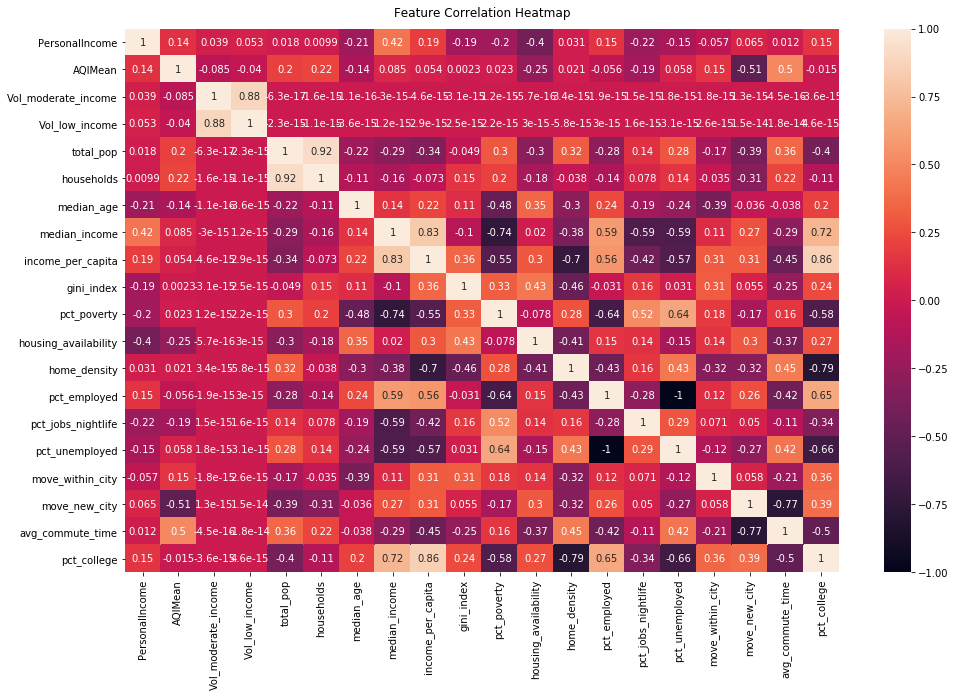

In [5]:
# try a correlation heat map to assess for multicollinearity

plt.figure(figsize=(16, 10)) # larger for ease of viewing

heatmap = sns.heatmap(scaled_feats.corr(), vmin=-1, vmax=1, annot=True)
# vmin/vmax are for the -1 to 1 on legend; annot=True lists corr vals in squares
heatmap.set_title('Feature Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

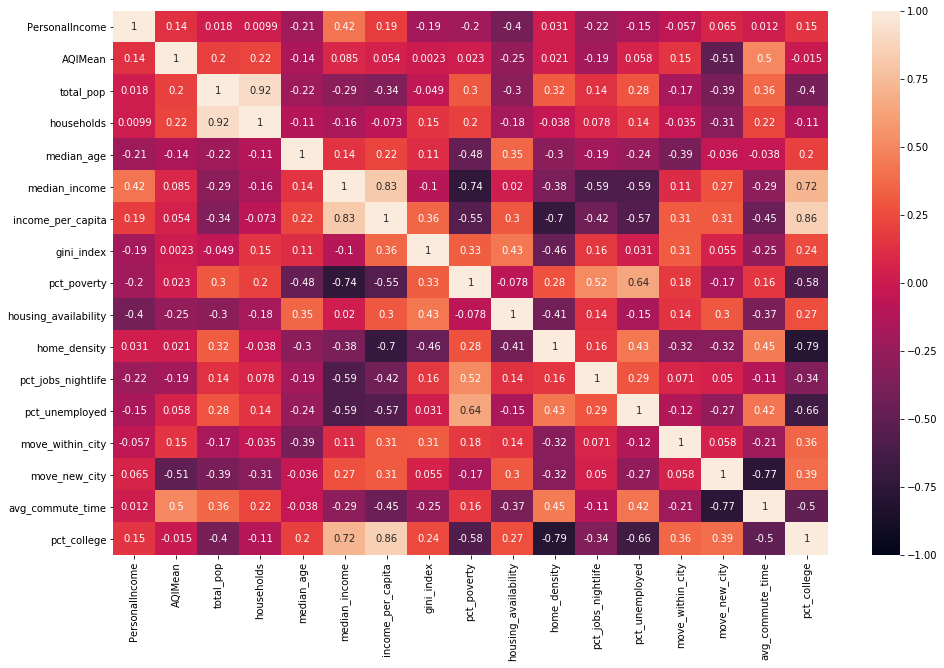

In [6]:
# removing a few feats that don't seem to be correlated:
# pct employed vs unemployed -> we only need to have the unemployed column (1-unemployed = employed)
# low/moderate income -> only really correlated with one another

df = scaled_feats.drop(['Vol_moderate_income','Vol_low_income','pct_employed'],axis=1)
plt.figure(figsize=(16,10)) # larger for ease of viewing
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [42]:
pca = PCA(n_components=17) # 9 features
pca.fit(df)
pca.explained_variance_ratio_

array([0.32124307, 0.16200514, 0.12529403, 0.09932163, 0.08021211,
       0.04504848, 0.03605765, 0.02752367, 0.02500122, 0.02220726,
       0.0182363 , 0.01436516, 0.00930281, 0.00667372, 0.00467311,
       0.00202864, 0.000806  ])

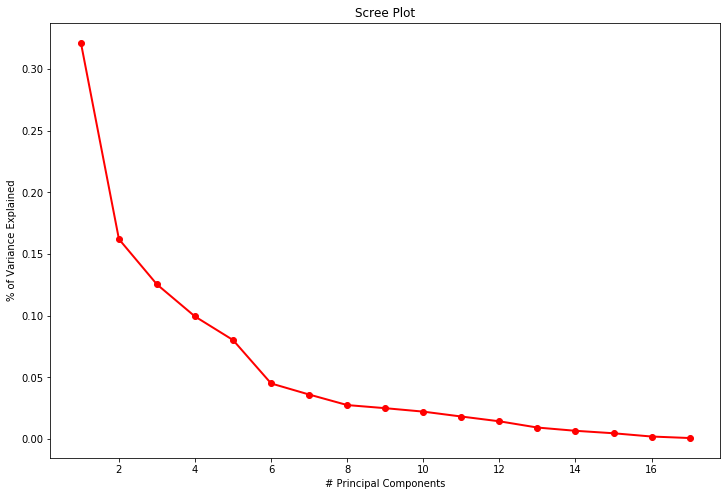

In [43]:
plt.figure(figsize=(12, 8))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('# Principal Components')
plt.ylabel('% of Variance Explained')
plt.show() # we could use 6 PCs

In [50]:
pca.set_params(n_components=5)
pca.fit(df)
zillow_pca = pca.transform(df)
pca.explained_variance_

In [60]:
fivePCModel = pd.DataFrame(zillow_pca,columns=['PC1','PC2','PC3','PC4','PC5'])

In [64]:
notpca = zillow[['Zipcode', 'City', 'State', 'Metro', 'County', 'SizeRank', 'Date',
                 'Rent', 'Year', 'State-County']]

In [66]:
fivePCModel = pd.concat((notpca,fivePCModel),axis=1)

In [69]:
fivePCModel.head()

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,PC1,PC2,PC3,PC4,PC5
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2015-01-01,3566.0,2015,NY-New York County,0.375709,-0.477269,4.222821,-1.427123,-1.455476
1,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2015-01-01,3413.0,2015,NY-New York County,3.035421,-1.039616,3.481363,-1.740920,-0.635692
2,10002,New York,NY,New York-Newark-Jersey City,New York County,7,2015-01-01,3508.0,2015,NY-New York County,-1.782419,0.958593,2.972139,-1.500729,-0.784467
3,11226,New York,NY,New York-Newark-Jersey City,Kings County,11,2015-01-01,1876.0,2015,NY-Kings County,-2.764733,-1.508810,2.286786,-0.982683,-1.140958
4,10467,New York,NY,New York-Newark-Jersey City,Bronx County,12,2015-01-01,1442.0,2015,NY-Bronx County,-4.388430,-0.423407,3.130730,-0.076299,-0.329126


In [68]:
fivePCModel.to_csv('../../data/fivePCModel.csv',index=False)

# PCA2

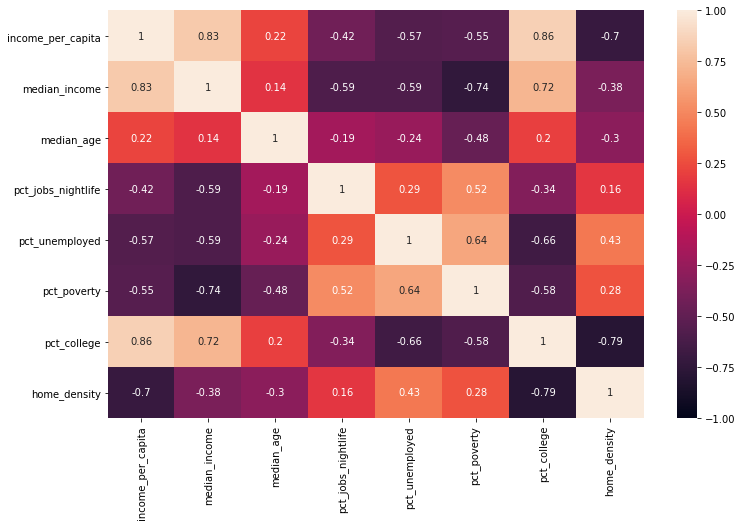

In [121]:
plt.figure(figsize=(12,7.5))
sns.heatmap(df[['income_per_capita','median_income','median_age',
                 'pct_jobs_nightlife','pct_unemployed','pct_poverty','pct_college',
                'home_density']].corr(),
           vmin=-1, vmax=1, annot=True)

In [107]:
PCsubset = df[['income_per_capita','median_income','median_age',
                 'pct_jobs_nightlife','pct_unemployed','pct_poverty','pct_college',
                'home_density']]
pca = PCA(n_components=8) # 8 features
pca.fit(PCsubset)
pca.explained_variance_ratio_ # use 3 PCs


array([0.56729619, 0.14171519, 0.12375713, 0.08006543, 0.04498188,
       0.02411578, 0.01069957, 0.00736883])

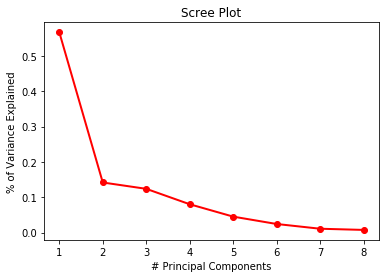

In [109]:
plt.figure(figsize=(6, 4))

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('# Principal Components')
plt.ylabel('% of Variance Explained')
plt.show() # we should use 3 principal components

In [112]:
pca.set_params(n_components=3)
pca.fit(PCsubset)
pca_subset = pd.DataFrame(pca.transform(PCsubset),columns=['PC1','PC2','PC3'])
pca_subset

,PC1,PC2,PC3
0,-1.362973,0.355586,0.375299
1,-3.827630,0.614175,0.221742
2,1.251526,1.643955,1.894220
3,1.137680,-0.073192,-0.264804
4,3.100337,0.575126,-0.253722
...,...,...,...
17746,1.754136,-1.315089,-0.594866
17747,1.179181,-2.193745,-0.753323
17748,0.445435,-0.759384,0.319702
17749,-3.963573,0.151196,-1.996771


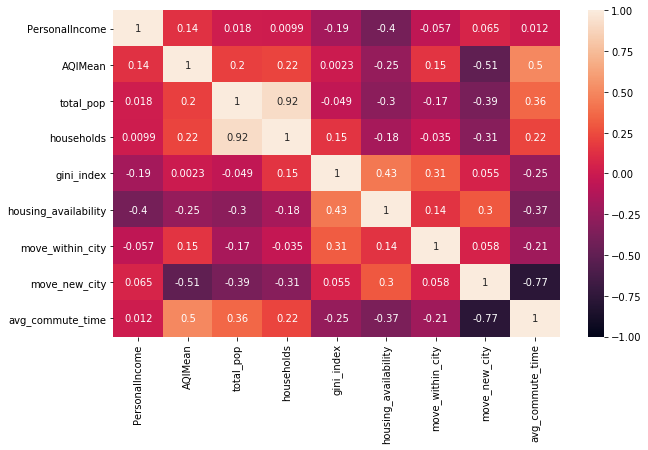

In [119]:
remaining_feats = df.drop(['income_per_capita', 'median_income', 'median_age', 'pct_jobs_nightlife', 
                           'pct_unemployed', 'pct_poverty', 'pct_college','home_density'],axis=1)

plt.figure(figsize=(10,6))
sns.heatmap(remaining_feats.corr(),
           vmin=-1, vmax=1, annot=True)

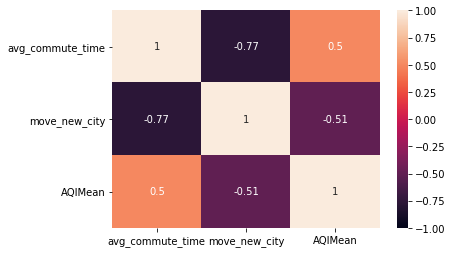

In [136]:
sns.heatmap(remaining_feats[['avg_commute_time','move_new_city','AQIMean']].corr(),
           vmin=-1, vmax=1, annot=True)

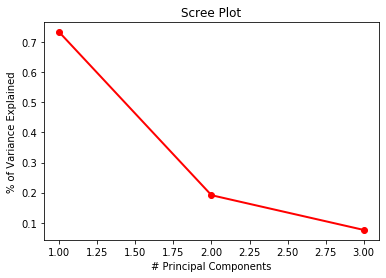

In [140]:
subset2 = remaining_feats[['avg_commute_time','move_new_city','AQIMean']]
pca = PCA(n_components=3) # 6 features
pca.fit(subset2)
pca.explained_variance_ratio_ # use 3 PCs

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('# Principal Components')
plt.ylabel('% of Variance Explained')
plt.show() # we should use 2 principal components

In [146]:
pca = PCA(n_components=2) # 6 features
pca.fit(subset2)
pca.explained_variance_ratio_ # use 2 PCs
movePC = pd.DataFrame(pca.transform(subset2),columns=['secondPC1','secondPC2'])

In [167]:
subset3 = remaining_feats.drop(['avg_commute_time','move_new_city','AQIMean'],axis=1)
notpca = zillow[['Zipcode', 'City', 'State', 'Metro', 'County', 'SizeRank', 'Date',
                 'Rent', 'Year', 'State-County','Vol_moderate_income','Vol_low_income']]
PCModel2 = pd.concat((notpca,pca_subset,movePC,subset3),axis=1)

In [169]:
PCModel2.to_csv('../../data/PCModel2.csv',index=False)

# pca3

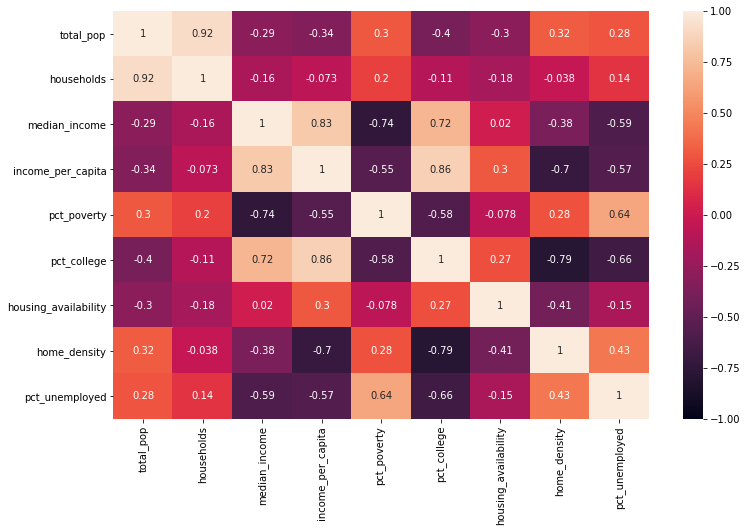

In [7]:
plt.figure(figsize=(12,7.5))
housing_feats = df[['total_pop','households','median_income','income_per_capita','pct_poverty','pct_college','housing_availability',
           'home_density','pct_unemployed']]
sns.heatmap(housing_feats.corr(),vmin=-1, vmax=1, annot=True)

In [8]:
pca = PCA(n_components=9) # 9 features
pca.fit(housing_feats)
pca.explained_variance_ratio_

array([0.49979413, 0.19333871, 0.13741686, 0.06798527, 0.05195976,
       0.03021779, 0.01114773, 0.00654682, 0.00159292])

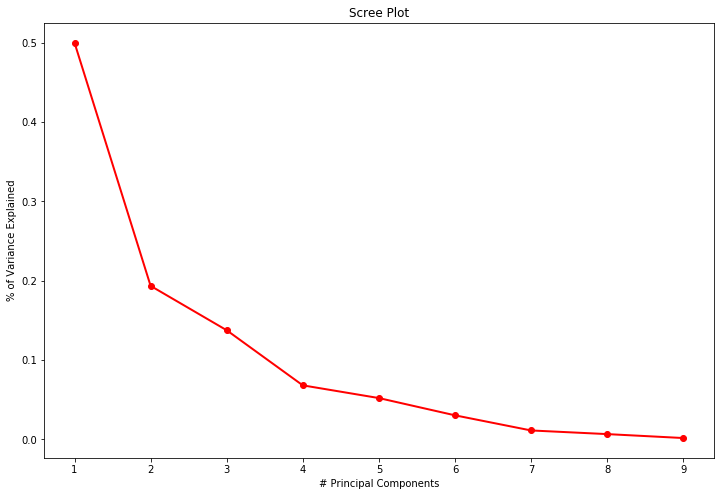

In [9]:
plt.figure(figsize=(12, 8))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('# Principal Components')
plt.ylabel('% of Variance Explained')
plt.show() # we should use 3 principal components

In [10]:
pca.set_params(n_components=3)
pca.fit(housing_feats)
housing_pca = pca.transform(housing_feats)

Text(0, 0.5, 'PC 2')

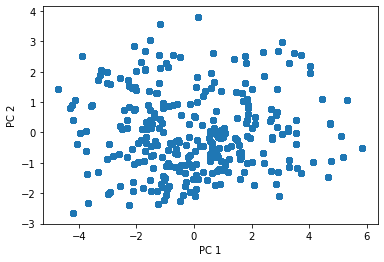

In [11]:
plt.scatter(housing_pca[:,0],housing_pca[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')

Text(0, 0.5, 'PC 3')

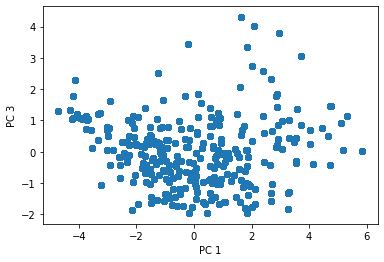

In [12]:
plt.scatter(housing_pca[:,0],housing_pca[:,2])
plt.xlabel('PC 1')
plt.ylabel('PC 3')

Text(0, 0.5, 'PC 3')

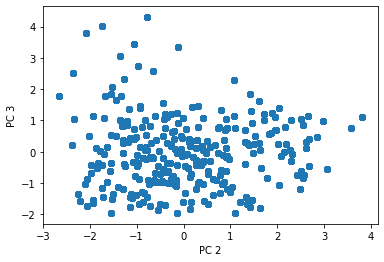

In [13]:
plt.scatter(housing_pca[:,1],housing_pca[:,2])
plt.xlabel('PC 2')
plt.ylabel('PC 3')

# analyze the features that were not in the PCA

In [14]:
df2 = df.drop(['total_pop','households','median_income','income_per_capita','pct_poverty','pct_college','housing_availability',
           'home_density','pct_unemployed'],axis=1) # remove features in the PCA

In [23]:
df2

,PersonalIncome,AQIMean,median_age,gini_index,pct_jobs_nightlife,move_within_city,move_new_city,avg_commute_time
0,-0.483885,1.677669,0.677914,2.090545,-0.502295,0.557787,-0.131412,-0.253440
1,-0.483885,1.677669,1.069040,1.450117,-0.646796,0.220614,-0.386784,-0.603104
2,-0.483885,1.677669,1.127709,1.861821,1.564514,-0.408679,-0.828548,-0.196208
3,-0.483885,1.677669,-0.612804,-0.261799,-0.115327,-0.598288,-0.990002,1.160614
4,-0.483885,1.861551,-0.808367,0.053137,0.573144,0.799210,-1.038250,1.299683
...,...,...,...,...,...,...,...,...
17746,-0.097893,1.447586,-0.436797,-1.176697,0.289008,-0.026267,-0.860410,1.482502
17747,-0.097893,1.447586,-0.182565,-1.204848,-1.109431,-0.359605,-0.907842,1.688282
17748,-0.097893,1.447586,0.541019,-0.740361,0.262706,-0.273917,-1.074206,0.966112
17749,-0.097893,1.422160,-1.003931,-2.030016,-1.885700,2.059386,1.319402,-0.483444


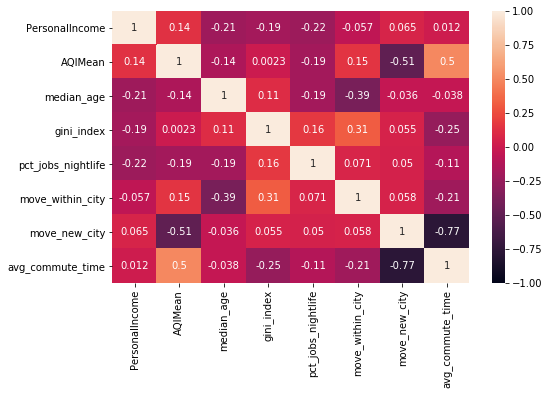

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(df2.corr(),vmin=-1, vmax=1, annot=True)

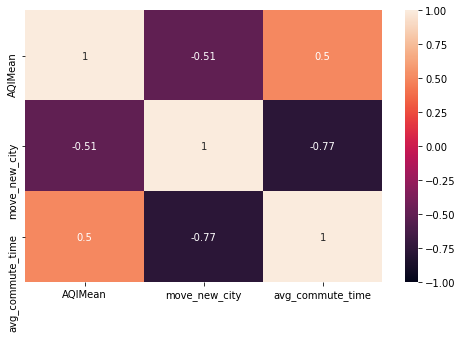

In [37]:
temp = df2.drop(['median_age','PersonalIncome','pct_jobs_nightlife','gini_index','move_within_city'],axis=1)
plt.figure(figsize=(8,5))
sns.heatmap(temp.corr(),vmin=-1, vmax=1, annot=True)

In [38]:
pca.explained_variance_ratio_

array([0.55060202, 0.27667591, 0.11985138, 0.05287069])

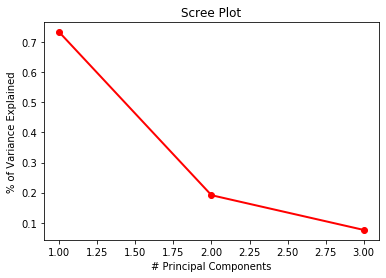

In [39]:
pca.set_params(n_components=3)
pca.fit(temp)

# plt.figure(figsize=(12, 8))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('# Principal Components')
plt.ylabel('% of Variance Explained')
plt.show() # we can use 1 PC

Text(0, 0.5, 'ZRI')

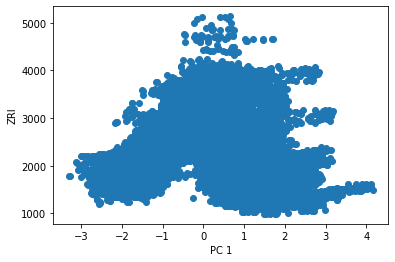

In [40]:
pca.set_params(n_components=1)
pca.fit(temp)
income_pca = pca.transform(temp)
plt.scatter(income_pca,zillow['Rent'])
plt.xlabel('PC 1')
plt.ylabel('ZRI')

In [ ]:
feats = features.drop(['total_pop','households','median_income','income_per_capita','pct_poverty','pct_college',
                       'housing_availability','home_density','pct_unemployed'],axis=1) # drop housing features

feats = feats.drop(['PersonalIncome','median_age','gini_index','pct_jobs_nightlife',
                    'move_within_city','move_new_city'],axis=1) # drop income features
feats = feats.drop('pct_employed',axis=1) # redundant w/ unemployement data


In [ ]:
incomePC = pd.DataFrame(income_pca, columns=['IncomePC'])

In [ ]:
housingPC = pd.DataFrame(housing_pca, columns = ['Housing_PC1','Housing_PC2','Housing_PC3'])

In [ ]:
pd.concat((feats,incomePC,housingPC),axis=1)

In [ ]:
zillow_temp = zillow.drop(['PersonalIncome', 'total_pop', 'households', 'median_age',
                   'median_income', 'income_per_capita', 'gini_index', 'pct_poverty',
                   'housing_availability', 'home_density', 'pct_employed',
                   'pct_jobs_nightlife', 'pct_unemployed', 'move_within_city',
                   'move_new_city','pct_college'],axis=1)
new_zillow = pd.concat((zillow_temp,incomePC,housingPC),axis=1)

In [ ]:
#new_zillow.to_csv('../../data/zillowPCA.csv',index=False)